<a href="https://colab.research.google.com/github/AtharvaTambat/WnCC-SoC-2022-QML/blob/main/Grover's_Search_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grover's Search Algorithm**

## **1. Importing the Necessary Libraries**

In [107]:
import math
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import BasicAer

# Use Aer's qasm_simulator
simulator = AerSimulator()

## **2. Defining the Oracle and Diffuser Block**
The following is the code for defining the Oracle and the Diffuser Block for Grover's Search - based on input (no. of bits and the binary value of x for which f(x) = 1) 

In [108]:
# Users can adjust the following parameters
t = 4 # No. of bits in the domain of the binary function f(x), { = 1 for only one x_0}
x_0 = 1101 # Any 4 bit number for which the value of f(x) = 1, for rest of the bit combinations, f(x) = 0 (NOTE: Ignore the less significant 0's after the least significant 1)
# NOTE: x_0's value is unknown to the one using the search

# Defining the Oracle and Diffuser gates
def oracle(x_0):

  U = QuantumCircuit(t+1)
  # Implementing the Oracle for a particular x_0 
  num = x_0
  i = 0
  # Adds a X gate in front of those qubits, where corresponding bit in x_0 = 0
  while(num>0):
    digit = num%10
    num = int(num/10)

    if (digit == 0):
      U.x(i)
    i = i +1

  while(i<4):
    U.x(i)
    i = i +1
    
  # Adds a multiple input toffoli gate to control the (t+1)th qubit
  U.mct(list(range(t)),t)

  # Adds a X gate in front of those qubits, where corresponding bit in x_0 = 0
  num = x_0
  i = 0
  while(num>0):
    digit = num%10
    num = int(num/10)

    if (digit == 0):
      U.x(i)
    i = i +1

  while(i<4):
    U.x(i)
    i = i +1
  
  U = U.to_gate()
  U.name = "Oracle"
  return U

def diffuser():
  U = QuantumCircuit(t+2)
  # Implementing the Diffuser 
  for i in range(t):
    U.h(i)

  num = 0
  i = 0

  # Adds a X gate in front of those qubits, where corresponding bit in x_0 = 0
  while(num>0):
    digit = num%10
    num = int(num/10)

    if (digit == 0):
      U.x(i)
    i = i +1

  while(i<4):
    U.x(i)
    i = i +1
    
  # Adds a multiple input toffoli gate to control the (t+1)th qubit
  U.mct(list(range(t)),t+1)

  # Adds a X gate in front of those qubits, where corresponding bit in x_0 = 0
  num = 0
  i = 0
  while(num>0):
    digit = num%10
    num = int(num/10)

    if (digit == 0):
      U.x(i)
    i = i +1

  while(i<4):
    U.x(i)
    i = i +1

  for i in range(t):
    U.h(i)

  U.x(t+1)
  U = U.to_gate()
  U.name = "Diffuser"
  return U



## **3. The Circuit**

In [109]:
qc = QuantumCircuit(t+2,t)
qc.x(t)
qc.x(t+1)

for i in range(t+2):
  qc.h(i)

for i in range(math.ceil(math.pi/4*math.sqrt((2**t)))):
  qc.barrier()  
  qc.append(oracle(x_0),range(t+1))
  qc.barrier()
  qc.append(diffuser(),range(t+2))
  qc.barrier()

qc.measure(range(t),range(t))
qc.draw(fold = -1)

┌───┐      ░ ┌─────────┐ ░ ┌───────────┐ ░  ░ ┌─────────┐ ░ ┌───────────┐ ░  ░ ┌─────────┐ ░ ┌───────────┐ ░  ░ ┌─────────┐ ░ ┌───────────┐ ░ ┌─┐         
q_0: ┤ H ├──────░─┤0        ├─░─┤0          ├─░──░─┤0        ├─░─┤0          ├─░──░─┤0        ├─░─┤0          ├─░──░─┤0        ├─░─┤0          ├─░─┤M├─────────
     ├───┤      ░ │         │ ░ │           │ ░  ░ │         │ ░ │           │ ░  ░ │         │ ░ │           │ ░  ░ │         │ ░ │           │ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░─┤1        ├─░─┤1          ├─░──░─┤1        ├─░─┤1          ├─░──░─┤1        ├─░─┤1          ├─░──░─┤1        ├─░─┤1          ├─░──╫─┤M├──────
     ├───┤      ░ │         │ ░ │           │ ░  ░ │         │ ░ │           │ ░  ░ │         │ ░ │           │ ░  ░ │         │ ░ │           │ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░─┤2 Oracle ├─░─┤2          ├─░──░─┤2 Oracle ├─░─┤2          ├─░──░─┤2 Oracle ├─░─┤2          ├─░──░─┤2 Oracle ├─░─┤2          ├─░──╫──╫─┤M├───
     ├───┤      ░ │         │ ░ │  Diffuser │ ░  ░ │         │ ░ │  Diffuser │ ░  ░ │         │ ░ │  Diffuser │ ░  ░ │         │ ░ │  Diffuser │ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░─┤3        ├─░─┤3          ├─░──░─┤3        ├─░─┤3          ├─░──░─┤3        ├─░─┤3          ├─░──░─┤3        ├─░─┤3          ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ │         │ ░ │           │ ░  ░ │         │ ░ │           │ ░  ░ │         │ ░ │           │ ░  ░ │         │ ░ │           │ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░─┤4        ├─░─┤4          ├─░──░─┤4        ├─░─┤4          ├─░──░─┤4        ├─░─┤4          ├─░──░─┤4        ├─░─┤4          ├─░──╫──╫──╫──╫─
     ├───┤├───┤ ░ └─────────┘ ░ │           │ ░  ░ └─────────┘ ░ │           │ ░  ░ └─────────┘ ░ │           │ ░  ░ └─────────┘ ░ │           │ ░  ║  ║  ║  ║ 
q_5: ┤ X ├┤ H ├─░─────────────░─┤5          ├─░──░─────────────░─┤5          ├─░──░─────────────░─┤5          ├─░──░─────────────░─┤5          ├─░──╫──╫──╫──╫─
     └───┘└───┘ ░             ░ └───────────┘ ░  ░             ░ └───────────┘ ░  ░             ░ └───────────┘ ░  ░             ░ └───────────┘ ░  ║  ║  ║  ║ 
c: 4/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                                                                                                    0  1  2  3

## **4. Running the Experiment**

Number of times that Oracle and Diffuser need to be applied is 4

Total count for possible combinations of output are:  {'0010': 27, '0001': 26, '0101': 25, '1100': 27, '1011': 29, '1000': 31, '1001': 25, '1101': 591, '0100': 35, '0110': 30, '1010': 30, '1111': 27, '0000': 32, '0111': 25, '0011': 36, '1110': 28}


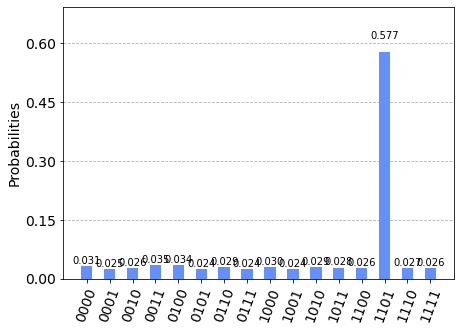

In [110]:
print("Number of times that Oracle and Diffuser need to be applied is", math.ceil(math.pi/4*math.sqrt((2**t))))
# Compiling the circuit
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1024)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc)
print("\nTotal count for possible combinations of output are: ", counts)

# Plot a histogram
plot_histogram(counts)

## **5. Guessing the binary number $x_0$ based on probabilities**

In [111]:
guess = max(counts, key=counts.get)
print("The value of x for which f(x) = 1 is", guess)

The value of x for which f(x) = 1 is 1101


😃😃😃😃...which is exactly the value of $x_0$ as initialized at the start.

## **6. A peek 🤫 into the ORACLE and DIFFUSER Blocks used in the circuit**
### **6.1 The ORACLE Block**

In [112]:
qc2 = QuantumCircuit(t+2,t)
# Implementing the Oracle for a particular x_0 
num = x_0
i = 0

# Adds a X gate in front of those qubits, where corresponding bit in x_0 = 0
while(num>0):
  digit = num%10
  num = int(num/10)

  if (digit == 0):
     qc2.x(i)
  i = i +1

while(i<4):
  qc2.x(i)
  i = i +1
   
# Adds a multiple input toffoli gate to control the (t+1)th qubit
qc2.mct(list(range(t)),t)

# Adds a X gate in front of those qubits, where corresponding bit in x_0 = 0
num = x_0
i = 0
while(num>0):
  digit = num%10
  num = int(num/10)

  if (digit == 0):
    qc2.x(i)
  i = i +1

while(i<4):
  qc2.x(i)
  i = i +1

qc2.draw()

q_0: ───────■───────
     ┌───┐  │  ┌───┐
q_1: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_2: ───────■───────
            │       
q_3: ───────■───────
          ┌─┴─┐     
q_4: ─────┤ X ├─────
          └───┘     
q_5: ───────────────
                    
c: 4/═══════════════

### **6.1 The Diffuser Block**

In [113]:
qc3 = QuantumCircuit(t+2,t)
# Implementing the Diffuser 
for i in range(t):
  qc3.h(i)

num = 0
i = 0

# Adds a X gate in front of those qubits, where corresponding bit in x_0 = 0
while(num>0):
  digit = num%10
  num = int(num/10)

  if (digit == 0):
    qc3.x(i)
  i = i +1

while(i<4):
  qc3.x(i)
  i = i +1
      
# Adds a multiple input toffoli gate to control the (t+1)th qubit
qc3.mct(list(range(t)),t+1)

# Adds a X gate in front of those qubits, where corresponding bit in x_0 = 0
num = 0
i = 0
while(num>0):
  digit = num%10
  num = int(num/10)

  if (digit == 0):
    qc3.x(i)
  i = i +1

while(i<4):
  qc3.x(i)
  i = i +1

for i in range(t):
  qc3.h(i)

qc3.x(t+1)

qc3.draw()

┌───┐┌───┐     ┌───┐┌───┐
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_3: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     └───┘└───┘  │  └───┘└───┘
q_4: ────────────┼────────────
               ┌─┴─┐┌───┐     
q_5: ──────────┤ X ├┤ X ├─────
               └───┘└───┘     
c: 4/═════════════════════════